<a href="https://colab.research.google.com/github/anto-richard/TSA_EXP2/blob/main/Timeseries_exp2_polyex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Polynomial Trend Estimation...

import numpy as np
from tabulate import tabulate

x = [2011,2012,2013,2014,2015,2016]
y = [100,107,128,140,181,192]
X = [2*(i-(sum(x)/len(x))) for i in x]
x2 = [i ** 2 for i in X]
xy = [i * j for i, j in zip(X, y)]
x3 = [i ** 3 for i in X]
x4 = [i ** 4 for i in X]
x2y=[i*j for i,j in zip(x2,y)]

table = [[i, j, k, l, m,n,o,p] for i, j, k, l, m,n,o,p in zip(x, y, X, x2, x3,x4,xy,x2y)]

print(tabulate(table, headers=["Year", "Prod", "X=x-2013", "X^2", "X^3","X^4","xy","x2y"], tablefmt="grid"))
coeff=[[len(X),sum(X)],[sum(X),sum(x2)]]

coeff=[[len(x),sum(X),sum(x2)],[sum(X),sum(x2),sum(x3)],[sum(x2),sum(x3),sum(x4)]]
Y=[sum(y),sum(xy),sum(x2y)]
A=np.array(coeff)
B=np.array(Y)

try:
  solution=np.linalg.solve(A,B)
except:
  print("error")

a,b,c=solution
print("a=%.2f, b=%.2f, c=%.2f"%(a,b,c))
print("Polynomial trend equation y=%.2f+%0.2fx+%.2fx^2"%(a,b,c))
l=[]

for i in range(len(X)):
  l.append(a+b*X[i]+c*x2[i])

+--------+--------+------------+-------+-------+-------+------+-------+
|   Year |   Prod |   X=x-2013 |   X^2 |   X^3 |   X^4 |   xy |   x2y |
+========+========+============+=======+=======+=======+======+=======+
|   2011 |    100 |         -5 |    25 |  -125 |   625 | -500 |  2500 |
+--------+--------+------------+-------+-------+-------+------+-------+
|   2012 |    107 |         -3 |     9 |   -27 |    81 | -321 |   963 |
+--------+--------+------------+-------+-------+-------+------+-------+
|   2013 |    128 |         -1 |     1 |    -1 |     1 | -128 |   128 |
+--------+--------+------------+-------+-------+-------+------+-------+
|   2014 |    140 |          1 |     1 |     1 |     1 |  140 |   140 |
+--------+--------+------------+-------+-------+-------+------+-------+
|   2015 |    181 |          3 |     9 |    27 |    81 |  543 |  1629 |
+--------+--------+------------+-------+-------+-------+------+-------+
|   2016 |    192 |          5 |    25 |   125 |   625 |  960 | 

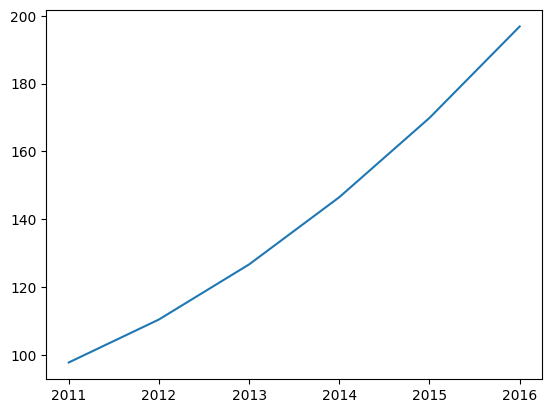

In [3]:
import matplotlib.pyplot as plt
plt.plot(x,l)